# 解微分方程

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 积分求解

$$\frac{dy}{dt} = sin(t)$$

In [11]:
def dy_dt(y,t):
    return np.sin(t)

In [12]:
# 积分求解
from scipy.integrate import odeint

t = np.linspace(0, 2*pi, 100)

result = odeint(dy_dt, 0, t)

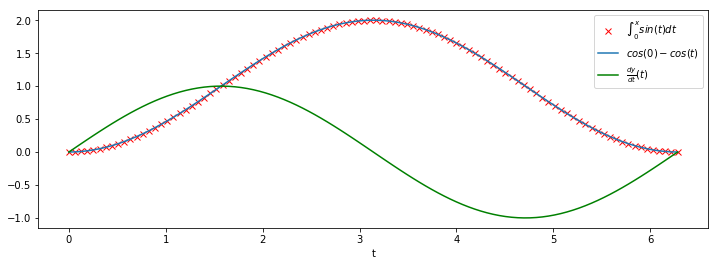

In [16]:
fig = figure(figsize=(12,4))
p = plot(t,result,'rx',label=r"$\int_{0}^{x}sin(t)dt$")
p = plot(t,-cos(t)+cos(0),label=r"$cos(0)-cos(t)$")
p = plot(t,dy_dt(0,t),'g-',label=r"$\frac{dy}{dt}(t)$")
l = legend(loc="upper right")
xl = xlabel("t")

## 高阶微分方程

抛物运动（竖直方向）：

$$\frac{d^2x}{dt^2} = g - \frac{D}{m}\frac{dx}{dt}$$

改写成如下形式：

$$y = \left[x, \frac{dx}{dt}\right]$$

$$\begin{aligned}
\frac{dy_0}{dt} &= y_1 \\\
\frac{dy_1}{dt} &= -g - \frac{D}{m} y_1 \\\
\end{aligned}$$


In [17]:
def dy_dt(y, t):
    """Governing equations for projectile motion with drag.
    y[0] = position
    y[1] = velocity
    g = gravity (m/s2)
    D = drag (1/s) = force/velocity
    m = mass (kg)
    """
    g = -9.8
    D = 0.1
    m = 0.15
    dy1 = g - (D/m) * y[1]
    dy0 = y[1] if y[0] >= 0 else 0.
    return [dy0, dy1]

In [18]:
# 初始位置和初始加速度
position_0 = 0.
velocity_0 = 100
t = linspace(0, 12, 100)
y = odeint(dy_dt, [position_0, velocity_0], t)

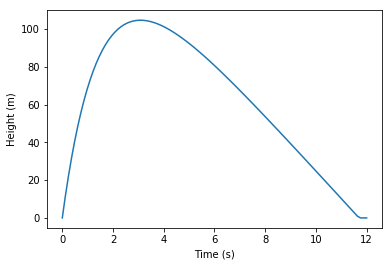

In [29]:
# 位置图像
p = plot(t, y[:,0])
y1 = ylabel("Height (m)")
x1 = xlabel("Time (s)")

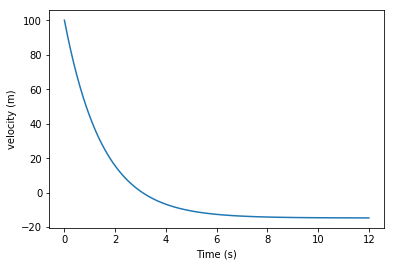

In [30]:
# 速度图像
p = plot(t, y[:,1])
y2 = ylabel("velocity (m)")
x2 = xlabel("Time (s)")

In [31]:
y, infodict = odeint(dy_dt, [position_0, velocity_0], t, full_output=True, printmessg=True, )
print sorted(infodict.keys())
print "cumulative number of function evaluations at each calculated point:", infodict['nfe']
print "cumulative number of time steps", infodict['nst']

['hu', 'imxer', 'leniw', 'lenrw', 'message', 'mused', 'nfe', 'nje', 'nqu', 'nst', 'tcur', 'tolsf', 'tsw']
cumulative number of function evaluations at each calculated point: [ 45  49  51  53  55  59  61  61  63  65  67  67  69  71  73  73  75  77
  77  79  79  81  81  83  85  85  87  87  89  89  91  91  93  95  95  97
  97  99  99 101 101 103 103 105 107 107 109 109 111 111 113 113 115 115
 117 117 119 119 121 121 123 123 123 125 125 127 127 129 129 131 131 131
 133 133 135 135 135 137 137 139 139 139 141 141 143 143 143 145 145 147
 147 149 149 149 154 158 283 289 289]
cumulative number of time steps [ 20  22  23  24  25  27  28  28  29  30  31  31  32  33  34  34  35  36
  36  37  37  38  38  39  40  40  41  41  42  42  43  43  44  45  45  46
  46  47  47  48  48  49  49  50  51  51  52  52  53  53  54  54  55  55
  56  56  57  57  58  58  59  59  59  60  60  61  61  62  62  63  63  63
  64  64  65  65  65  66  66  67  67  67  68  68  69  69  69  70  70  71
  71  72  72  72  73  75 1

d:\python\lib\site-packages\scipy\integrate\odepack.py:221: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)
